In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet_2.AutoUnet_2 import *
from NN_library.AutoUnet_2.train_AutoUnet_2 import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 8)

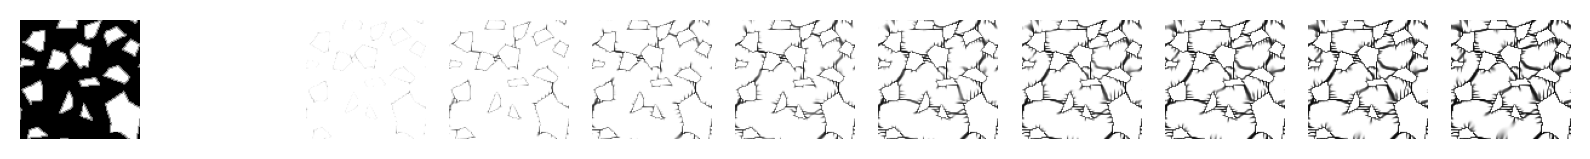

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys', vmin=0, vmax=1)
    axs.flat[i].set_axis_off()

In [25]:
name = 'NN_library/AutoUnet_2/AutoUnet_2'
args = {'lr' : 0.000001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet(72)

In [27]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 9741962


In [26]:
unet = load_network(unet, args['name']+'_49', args)

In [28]:
losses_train, losses_val = train(unet, loaders, args) 

Epoch: 0 batch: 0 mean train loss:  1991.3167580515
Epoch: 0 batch: 100 mean train loss:  1768.2974816263
Epoch: 0 batch: 200 mean train loss:  2304.8933193386
Epoch: 0 batch: 300 mean train loss:  1982.3702209890
Epoch: 0 batch: 400 mean train loss:  2511.5798649192
Epoch: 0 batch: 500 mean train loss:  2227.3177406788
Epoch: 0 batch: 600 mean train loss:  2241.9265043139
Epoch: 0 batch: 700 mean train loss:  2439.7624871731
Epoch: 0 batch: 800 mean train loss:  1823.7260618806
Epoch: 0 batch: 900 mean train loss:  2573.2782500181
Epoch: 0 batch: 1000 mean train loss:  2557.5698293708
Epoch: 0 batch: 1100 mean train loss:  2465.8098699450
Epoch: 0 batch: 1200 mean train loss:  1906.5970117748
Epoch: 0 batch: 1300 mean train loss:  2061.9792029485
Epoch: 0 batch: 1400 mean train loss:  2044.2342309803
Epoch: 0 mean train loss:  2196.4115642834 mean val. rec. loss:  2156.1181640625
Epoch: 1 batch: 0 mean train loss:  1716.2915716767
Epoch: 1 batch: 100 mean train loss:  2315.4110587835


KeyboardInterrupt: 

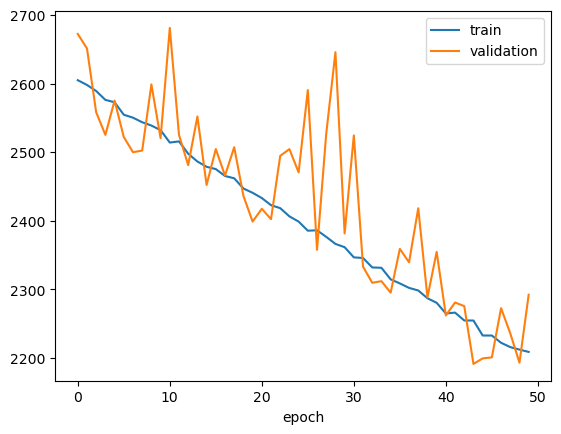

In [22]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])